# DAAN 862 Lesson 8 Assignment 1

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [45]:
# Load Breast Cancer dataset
data = pd.read_csv('breastcancer.csv')

## Question 1: Perform Data Exploratory Analysis
## Correlation matrix heatmap to show relationships between features

In [48]:
print(data.head())

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


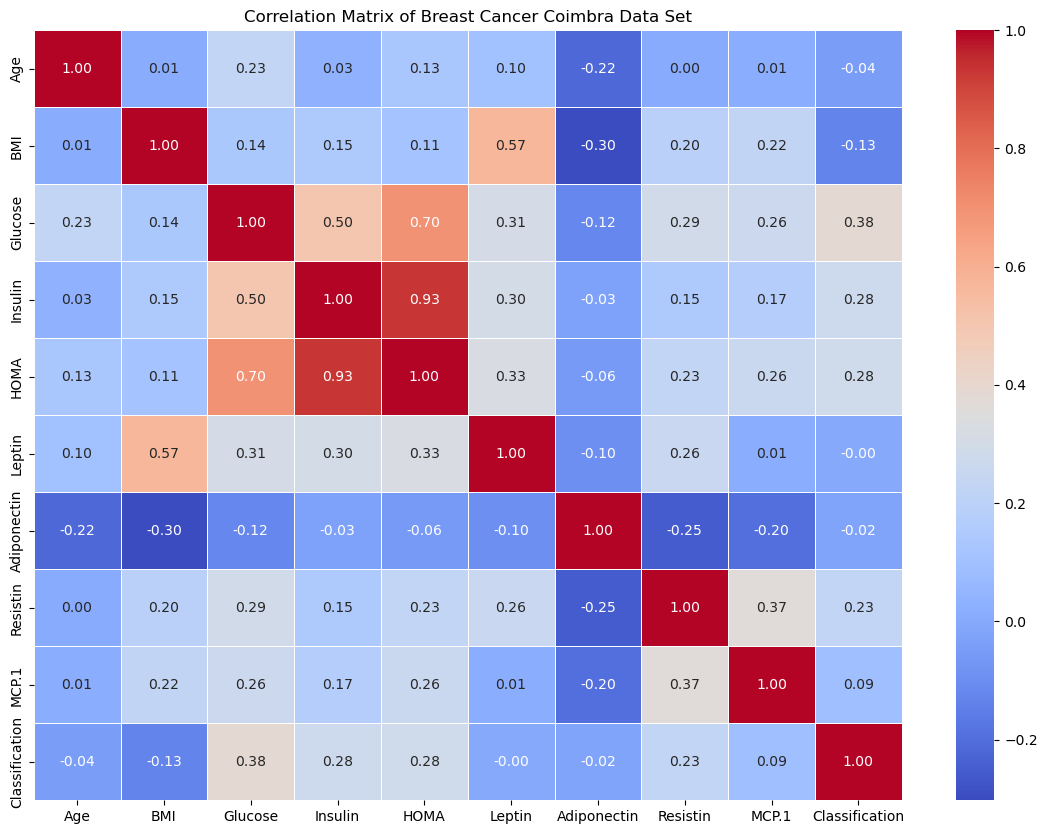

In [50]:
# Correlation matrix heatmap to show relationships between features
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Breast Cancer Coimbra Data Set")
plt.show()

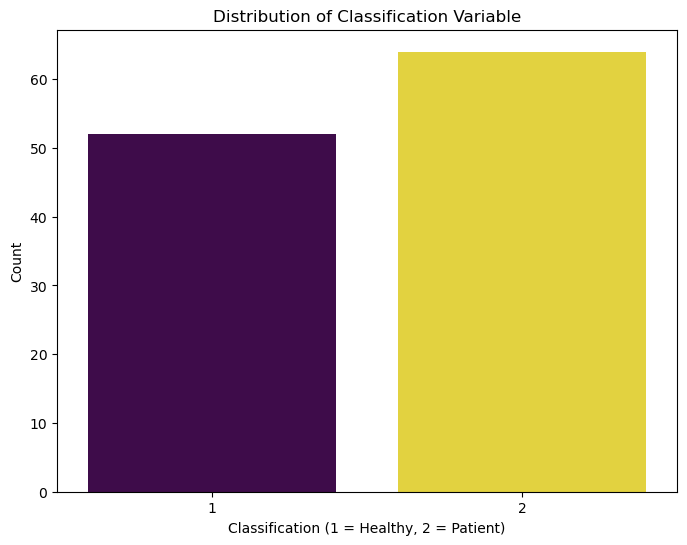

In [54]:
# Distribution of the Classification variable (1 = Healthy, 2 = Patients)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Classification', hue='Classification', palette='viridis', dodge=False, legend=False)
plt.title("Distribution of Classification Variable")
plt.xlabel("Classification (1 = Healthy, 2 = Patient)")
plt.ylabel("Count")
plt.show()


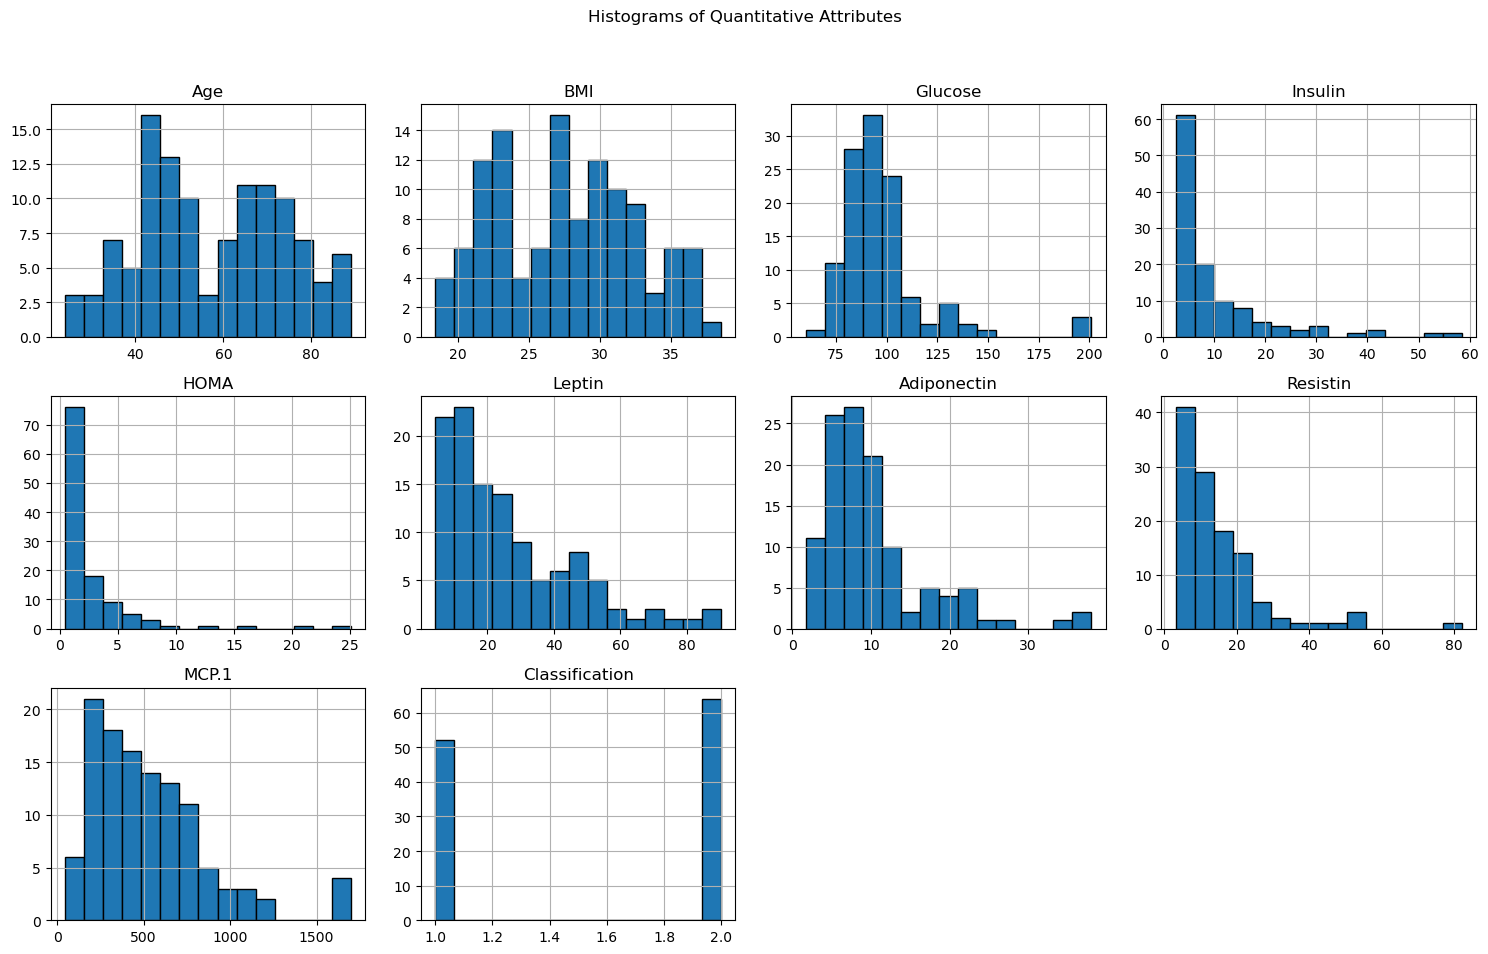

In [56]:
# Histograms of each quantitative attribute to visualize distributions
data.hist(bins=15, figsize=(15, 10), layout=(3, 4), edgecolor='black')
plt.suptitle("Histograms of Quantitative Attributes")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Question 2: Use 30% of data as the test set and build a Logistic Regression model



In [59]:
# Data preprocessing
X = data.drop('Classification', axis=1)
y = data['Classification']

In [61]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_acc)


Logistic Regression Accuracy: 0.7428571428571429


## Question 3: Build the Naïve Bayes model to predict the Classification variable



In [70]:
# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_acc)

Naive Bayes Accuracy: 0.6571428571428571


## Question 4: Build the Decision Tree model to predict the Classification variable

In [73]:

# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)



Decision Tree Accuracy: 0.7714285714285715


## Question 5: Build the Neural Network model to predict the Classification variable

In [78]:
# Standardize the feature set for the Neural Network model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Neural Network Model
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=42)
nn.fit(X_train_scaled, y_train)
nn_pred = nn.predict(X_test_scaled)
nn_acc = accuracy_score(y_test, nn_pred)
print("Neural Network Accuracy:", nn_acc)



Neural Network Accuracy: 0.8285714285714286


## Question 6: Which model is the best? Which variable is the most important one?

In [85]:
# Compare models by accuracy
models = {
    'Logistic Regression': log_reg_acc,
    'Naive Bayes': nb_acc,
    'Decision Tree': dt_acc,
    'Neural Network': nn_acc
}
best_model = max(models, key=models.get)
print("\nBest Model:", best_model, "with accuracy:", models[best_model])

# Feature Importance for Decision Tree model
importances = dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Decision Tree):\n", feature_importance_df)


Best Model: Neural Network with accuracy: 0.8285714285714286

Feature Importance (Decision Tree):
        Feature  Importance
2      Glucose    0.350359
1          BMI    0.146739
6  Adiponectin    0.134822
0          Age    0.113366
7     Resistin    0.070474
5       Leptin    0.067533
4         HOMA    0.059209
8        MCP.1    0.057498
3      Insulin    0.000000
